In [25]:
from sklearn import datasets
faces=datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

In [2]:
k=faces.images[1]
k.shape

(64, 64)

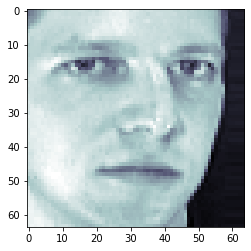

In [3]:
import matplotlib.pyplot as plt
plt.imshow(k,cmap=plt.cm.bone)

In [5]:
fig=plt.figure(figsize=(8,6))
for i in range(15):
    ax=fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
    ax.imshow()

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "opencv"



In [68]:
from sklearn.decomposition import PCA
pca=PCA() #this will reduce the dimensions .9 bhi daal sakte hai
pca.fit(faces.data)

PCA()

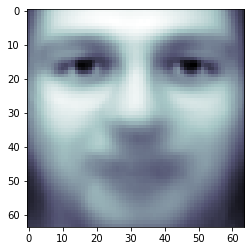

In [44]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [45]:
print(pca.components_.shape)

(100, 4096)


[18.840137   11.071757    6.3046074   3.954582    2.8560421   2.4977102
  1.920065    1.6111594   1.5492233   1.3229511   1.2621095   1.1369106
  0.98639756  0.90758955  0.840928    0.77355367  0.7271426   0.6452658
  0.59645116  0.5910004   0.5527011   0.48628226  0.46199262  0.4507534
  0.43213564  0.42079383  0.40652147  0.39230022  0.36209515  0.34905604
  0.31805605  0.30396348  0.28636864  0.2646834   0.2534789   0.2500454
  0.24142651  0.23627393  0.22322412  0.21678822  0.20552596  0.20095117
  0.19348031  0.18975554  0.18267453  0.17913796  0.17586663  0.17440735
  0.16528957  0.16217275  0.15573615  0.15145735  0.1463972   0.14156027
  0.14051308  0.13645461  0.13337429  0.12986237  0.12806164  0.12529777
  0.12295235  0.12041491  0.1186022   0.11676012  0.11274581  0.11117695
  0.10828386  0.10591249  0.10347573  0.10174878  0.10070804  0.09975915
  0.09784465  0.09590086  0.093036    0.09073002  0.09011317  0.08692039
  0.08667559  0.08571821  0.08406029  0.08245642  0.0799

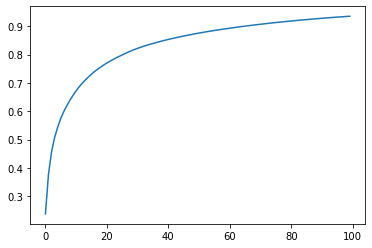

In [46]:
import numpy as np
print(pca.explained_variance_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

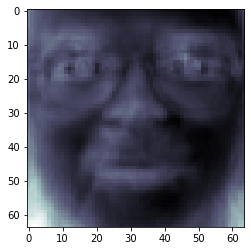

In [47]:
plt.imshow(pca.components_[0].reshape(faces.images[0].shape),cmap=plt.cm.bone)

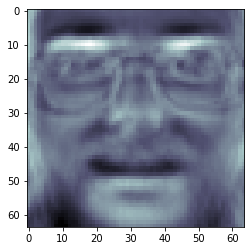

In [48]:
plt.imshow(pca.components_[10].reshape(faces.images[0].shape),cmap=plt.cm.bone)

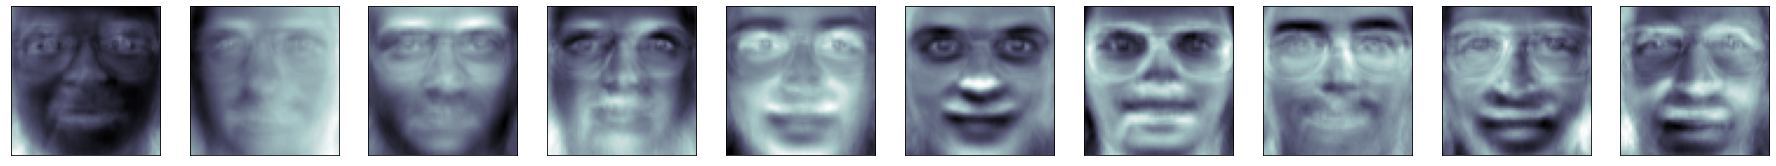

In [49]:
fig=plt.figure(figsize=(320,120)) #white is common
for i in range(10):
    ax=fig.add_subplot(3,100,i+1,xticks=[],yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [50]:
faces_pca=pca.fit_transform(faces.data)
print(faces_pca.shape)

(400, 100)


In [51]:
faces_proj=pca.inverse_transform(faces_pca) #(400, 400)*(400,4096) mmult(V,X)
print(faces_proj.shape)

(400, 4096)


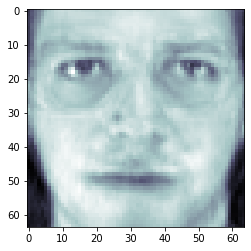

In [52]:
plt.imshow(faces_proj[0].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [53]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [54]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image

In [145]:
import cv2
import time

cap = cv2.VideoCapture(0) #to capture image
count = 0
while True:
    ret, frame = cap.read()
    count += 1
    face = cv2.resize(frame, (200,400))
    file_name_path="C:/Users/wangd/Ismail new/NMIMS/Sem V/Foundations of Machine Learning/img/"+str(count)+'.jpg'
    cv2.imwrite(file_name_path,face)
    cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Face Cropper', face)
    
    time.sleep(0.01) # pauses the execution for 3 seconds

    if cv2.waitKey(1) == 13 or count == 50: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")


In [61]:
import os
def get_image_array(path): #convert image into an array
    image_list = os.listdir(path)
    images = []
    for img in image_list:
        img = cv2.imread(path + '/' + img,0)
        images.append(img)
    return np.array(images)

In [131]:
img="C:/Users/wangd/Ismail new/NMIMS/Sem V/Foundations of Machine Learning/img"
images=get_image_array(img)
images.shape
#height, width

(50, 400, 200)

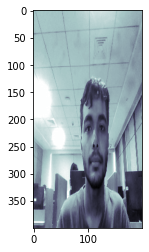

In [132]:
plt.imshow(images[0],cmap=plt.cm.bone)

In [128]:
images = np.array(images)
images.shape
images=images.reshape(50,400*200)
images.shape
images=images/255
images

array([[0.76078431, 0.76470588, 0.76470588, ..., 0.61568627, 0.59215686,
        0.58431373],
       [0.77254902, 0.77647059, 0.76078431, ..., 0.61176471, 0.61568627,
        0.60784314],
       [0.72941176, 0.70980392, 0.69411765, ..., 0.56078431, 0.54509804,
        0.54117647],
       ...,
       [0.77254902, 0.76078431, 0.77254902, ..., 0.61176471, 0.6       ,
        0.61568627],
       [0.78039216, 0.77647059, 0.76862745, ..., 0.60784314, 0.62745098,
        0.59607843],
       [0.77647059, 0.76078431, 0.76470588, ..., 0.60392157, 0.58431373,
        0.61176471]])

In [108]:
from sklearn.decomposition import PCA
pca1=PCA(20) #this will reduce the dimensions .9 bhi daal sakte hai
pca1.fit(images.data)

PCA(n_components=20)

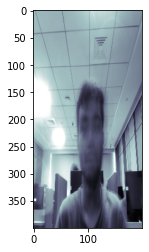

In [109]:
plt.imshow(pca1.mean_.reshape(400,200),cmap=plt.cm.bone)

In [110]:
images.shape

(50, 80000)

In [111]:
print(pca1.components_.shape)

(20, 80000)


[120.48049597  47.3894642   32.80371015  28.96373225  23.6957332
  14.20911329  11.81484276   9.66171848   8.52213169   7.49650397
   6.82486841   6.04005385   5.89522216   5.36773771   4.62086184
   4.39386252   4.09632927   4.00229336   3.68519004   3.49844109]


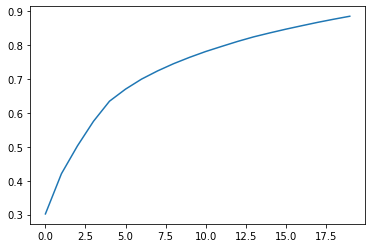

In [112]:
import numpy as np
print(pca1.explained_variance_)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.show()

In [113]:
faces_pca1=pca1.fit_transform(images.data)
print(faces_pca1.shape)

(50, 20)


In [114]:
faces_proj=pca1.inverse_transform(faces_pca1) #(400, 400)*(400,4096) mmult(V,X)
print(faces_proj.shape)

(50, 80000)


AxesImage(54,36;334.8x217.44) AxesImage(54,36;334.8x217.44)


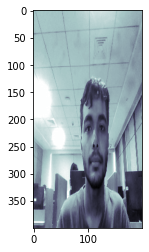

In [134]:
plt.imshow(faces_proj[0].reshape(400,200),cmap=plt.cm.bone)

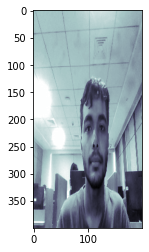

In [144]:
plt.imshow(images[0],cmap=plt.cm.bone)

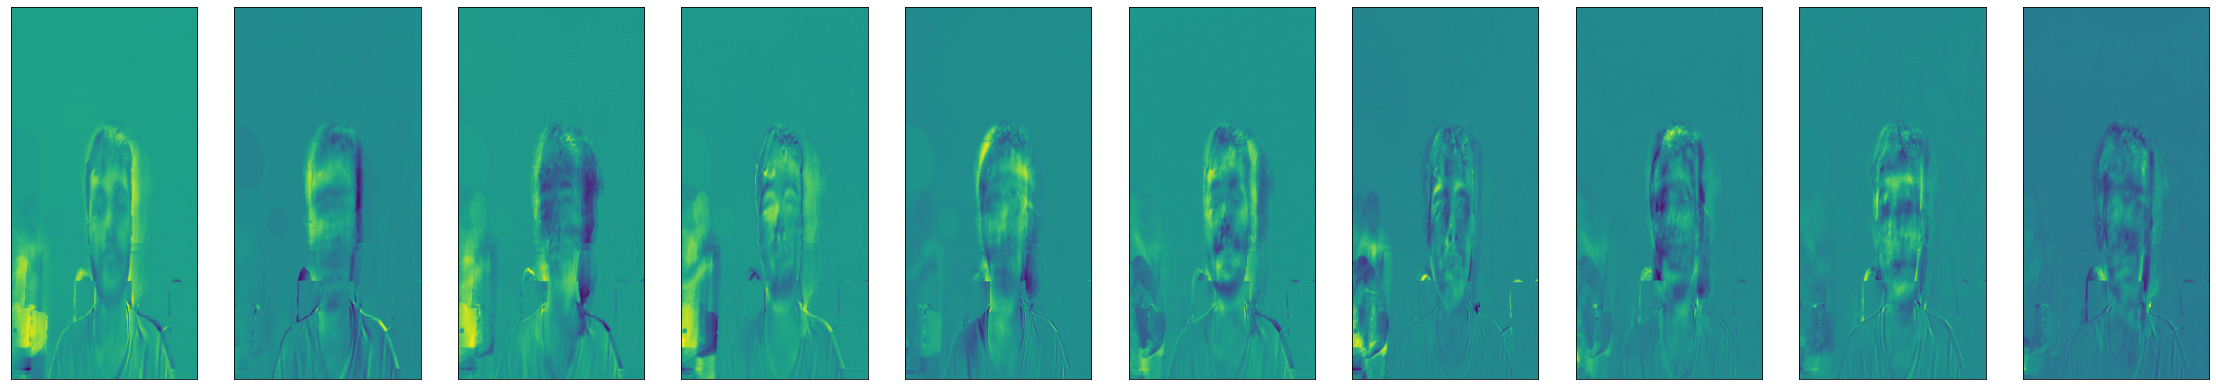

In [138]:
fig=plt.figure(figsize=(400,200)) #white is common
for i in range(10):
    ax=fig.add_subplot(3,100,i+1,xticks=[],yticks=[])
    ax.imshow(pca1.components_[i].reshape(400,200))